## Gradient Boosting Machines (GBM)

Las GBM son algoritmos que se volvieron muy populares con la aparición de XGBoost en el 2016 para las tareas de clasificación y regresión. En términos de funcionamiento, estos algoritmos utilizan múltiples "weak-learners" con los que a través de múltiples iteraciones corrigen los errores que presentan sus regresores/clasificadores en etapas anteriores.

		❓ Pregunta: ¿Qué características tienen los "weak-learners"?

1.  El objetivo no es crear clasificadores potentes con ellos, si no como su nombre lo dice queremos generar "aprendices débiles" que se potencian con otros.
2. En general se utilizan como weak learners árboles de decisión por su simpleza y versatilidad que nos ofrecen para regresión y clasificación.
3. Pueden ser entrenados con una muestra de la totalidad para obtener entrenamientos rápidos sobre ellos.
4. Su uso en un algoritmo implica la comprensión de estos elementos, ya que se heredan sus problemas en una estructura más compleja.

❓ Pregunta: ¿Qué problemas tenían los árboles de decisión?
![3 Techniques to Avoid Overfitting of Decision Trees | by Satyam Kumar |  Towards Data Science](https://miro.medium.com/v2/resize:fit:1702/1*KbRVJC5B0EgO8YAyeCrLkA.png)

Recordar que los árboles de decisión son elementos que tienen una alta facilidad de sobre-ajustarse si aumentamos la profundidad o número de hijos por nodo. Esto puede causar problemas en un algoritmo de GBM y por ello, este debe ser un valor que debemos controlar de forma directa o indirectamente.

Adentrándonos más en detalles en el algoritmo de gradient boosting, estos forman parte de los algoritmos de ensemble, que básicamente son algoritmos que combinan múltiples modelos para el proceso de predicción. Una forma de esto es a través de modelos aditivos, donde entrenando múltiples algoritmos simples de forma independiente, utilizamos la suma de sus salidas para generar un modelo más potente para la regresión/clasificación:
$$F_M(x) = f_1(x)+...+f_M(x)=\sum_{m=1}^M f_m(x)$$
![Develop an Intuition for How Ensemble Learning Works -  MachineLearningMastery.com](https://machinelearningmastery.com/wp-content/uploads/2020/07/Example-of-Combining-Decision-Boundaries-Using-an-Ensemble.png)


### GBM: Regresión

La idea que sigue por detrás las GBM es realizar descenso del gradiente a una función $\hat{f}$ en el espacio de funciones. O sea, si utilizamos un conjunto $f$ de funciones deseamos disminuir, todo lo posible la función de error que representa la función de pérdida ($\mathcal{L}$) durante el entrenamiento. Formalmente:	
$$\hat{f}=argmin_f \, \mathcal{L}(f)$$
donde $f$:
$$f = (f(x_1), ..., f(x_N))$$
Donde en cada paso $m$ (número de la iteración) generaremos un gradiente $g_m$ de la función $\mathcal{L(f_m)}$ :
$$g_m = [\dfrac{\partial{l}(y_i,f(x_i))}{\partial{f}(x_i)}]_{f=f_{m-1}}$$
En cada una de las iteraciones del modelo $g_m$ se encargará de actualizar el valor de $f_{m-1}$, de tal forma de generar la función $f_m$ de la iteración. $g_m$ es la expresión matemática que contiene la información de los errores de la predicción anterior que deseamos corregir en cada iteración. 

Luego, para comprender la actualización situémonos en el paso $m$, en el tendremos:
$$f_m = f_{m-1} - \beta_{m}g_{m}$$
Donde $\beta_m$ se define como el largo del paso en la corrección. Visto de otra forma, podemos interpretar este valor como un factor de aprendizaje que podremos fijar o optimizar en la función, señalando cuánta corrección aplicaremos del proceso anterior en el proceso actual. 

Si bien en cada una de las iteraciones encontraremos un valor óptimo para $f_m$ y $N$ puntos, está por sí sola no genera un clasificador global capaz de obtener mejores generalizaciones, por esta razón necesitamos definir una nueva función con la misma idea pero que en cada iteración se haga más robusta. En esta modificación, el algoritmo para ajustar los weak-learners a una aproximación de la señal negativa del gradiente, donde en cada iteración entrena un nuevo weak learner, quedando la actualización de la función como:
$$F_m = argmin_F \sum_{i=1}^N (-g_{im}-F(x_i))^2$$
Notar que $F(x_i)$ es un weak learner que se entrena en cada una de las iteraciones de nuestro algoritmo de GBM.

Finalmente el algoritmo se vería como:

![](https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/21_Ensamblaje/Pasted%20image%2020230527153450.png?raw=true)


### GBM: Clasificación

		❓ Pregunta: ¿Debería ser diferente la clasificación a la regresión?

La respuesta directa a esto es "sí". Los cambios que presenta la clasificación respecto a la regresión se dan netamente en la elección de la función de pérdida ($\mathcal{L}$) y algunas consideraciones que se toman para las salidas de los nodos.

Respecto a las funciones de pérdida, esto se debe a cómo se define el problema de clasificación supervisada, donde nuestro interés no será la reducción del error que tenemos del valor estimado respecto a un valor continuo. En su reemplazo son utilizadas funciones de pérdida para clasificación, quienes tienen como principal objetivo disminuir el error predecir una etiqueta. Una de las funciones de pérdidas más conocidas/utilizadas para el problema de clasificación se encuentra la logistic-loss/cross-entropy:
$$\mathcal{L}_i = -(y_i log(p_i) + (1-y_i)log(1-p_i))$$
	❓ Pregunta:  ¿Cómo podemos interpretar esta función de pérdida?
	
Donde su derivada es:
$$\dfrac{\partial \mathcal{L}_i}{\partial \hat{y}}=p_i-y_i$$
El segundo punto a considerar es que la estimación de $y$ será igual a:
$$\hat{y}=log(odds)=log(\dfrac{p}{1-p})$$
		❓ Pregunta:  ¿Por qué usamos odds?
		
Básicamente debido a que los modelos de clasificación con GBM son modelos de regresión, por lo que sus salidas no pueden ser consideradas como probabilidades, sino como scores que debemos transformar y normalizar.

Finalmente para calcular las probabilidades de las salidas de nuestro GBM tendremos que calcular la función softmax de $\hat{y}$, la que viene dada por:
$$\text{softmax}(\hat{y})=\dfrac{1}{1+e^{-\hat{y}}}$$

In [3]:
import math

p = 0.99
y = 0
-(y*math.log(p)+(1-y)*math.log(1-p))

4.605170185988091

In [4]:
p = 0.9
y = 1
-(y* math.log(p) + (1-y)*math.log(1-p))

0.10536051565782628

In [5]:
p = 0.3
y = 0
-(y* math.log(p) + (1-y)*math.log(1-p))

0.35667494393873245

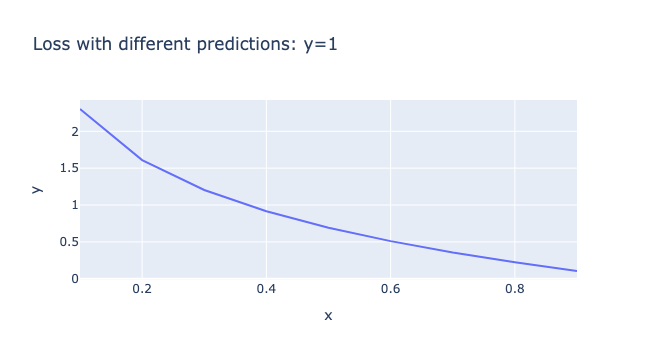

In [13]:
lis1, prob = [], []
for i in range(1, 10):
    y = 1
    lis1.append(-(y* math.log(i/10) + (1-y)*math.log(1-i/10)))
    prob.append(i/10)

import plotly.express as px

px.line(x=prob, y=lis1, title=f'Loss with different predictions: y={y}')

### Retrospectiva

		❓ Pregunta: ¿Pero cómo podríamos simplificar estas definiciones que acabamos de dar?

Si visualizamos GBM en un juego de golf, tendríamos un jugador que comienza con un tiro $f_0$, el cual a medida que va realizando cada tiro va aplicando una corrección $\Delta_m$ en cada una de sus jugadas. Con esto, si cerebralmente el jugador corrige sus errores a través de una función MSE, tendremos que el jugador irá optimizando esta función hasta meter la pelota en el agujero (mínimo de la función de pérdida).

$\text{MSE LOSS} = \mathcal{L}(y, F_M(X))=\dfrac{1}{N} \sum_{i=1}^N (y_i - F_M(x_i))^2$

![](https://explained.ai/gradient-boosting/images/golf-MSE.png)

		❓ ¿Cómo podría el golfista corregir de mejor forma sus tiros? ¿Existe alguna forma?.
		
![1d-vectors.png](https://explained.ai/gradient-boosting/images/1d-vectors.png)

Como vimos durante el entrenamiento de GBM, este proceso considera un $\nu$ conocido como shrinkage rate o learning rate. Este valor nos permitirá realizar correcciones en las actualizaciones de nuestras funciones $f_m$, ya que podría darse el caso que el gradiente obtenido durante la optimización sea muy alto y nos permita obtener un mínimo adecuado para el problema. De esta forma:
$$f_m(x) = f_{m-1}(x) + \nu F_m(x)$$
Otra forma podría ser cambiando la función de pérdida que definimos en el problema. Dependiendo si es un problema de clasificación o regresión existen múltiples funciones de pérdida con diferentes interpretaciones que pueden mejorar significativamente el problema que deseamos resolver. Algunas de estas son:

| Nombre         | Loss                         | Derivada           |  
| -------------- | ---------------------------- | ------------------ |
| Squeared Error | $\dfrac{1}{2}(y_i-f(x_i))^2$ | $y_i -f(x_i)$      |
| Absolute Error | $y_i - f(x_i)$               | $sgn(y_i -f(x_i))$ |
| Binary Logloss                | $log(1+e^{-y_if_i})$  | $y-\sigma(2f(x_i))$    |


En tercer lugar tenemos la adición de un regularizador a nuestra función de pérdida, de esta forma podremos disminuir el sobreajuste de nuestro modelo, generando pequeñas modificaciones en los árboles que vamos generando.
$$\mathcal{L}(f) = \sum_{i=1}^Nl(y_i,f(x))+\Omega(f))$$
donde $\Omega$:
$$\Omega(f)= \gamma J+\dfrac{1}{2}\lambda \sum_{j=1}^J w^2_j$$

### Pros & Cons

**Pros**:

- Capacidad para manejar tanto problemas de regresión como de clasificación.
- Puede capturar relaciones no lineales y características complejas en los datos.
- Adaptabilidad a diferentes tipos de predictores, incluyendo variables numéricas y categóricas.
- Robustez ante valores atípicos y datos ruidosos.
- Capacidad para manejar grandes conjuntos de datos y escalabilidad.
- Flexibilidad en la elección de funciones de pérdida y métricas de evaluación.
- Capacidad para manejar características faltantes y utilizar todas las observaciones disponibles.
- Puede generar importancia de variables para ayudar en la interpretación y selección de características.

**Contras**:

- Mayor complejidad y tiempo de entrenamiento en comparación con algoritmos más simples.
- Puede ser propenso a sobreajuste si no se controlan los hiperparámetros adecuadamente.
- Requiere una configuración cuidadosa de los hiperparámetros para obtener el mejor rendimiento.
- Interpretación más difícil debido a la naturaleza de combinación de múltiples árboles.
- Sensible a datos desequilibrados, donde las clases minoritarias pueden no recibir suficiente atención.
- La importancia de las variables puede verse sesgada hacia las variables numéricas o con mayor cardinalidad.
- No es adecuado para problemas con alta dimensionalidad o con muchos predictores.
- Mayor consumo de recursos computacionales en comparación con algoritmos más simples.


## Ejemplo a Mano 🤨

Como ya sabemos como funciona por detrás un algoritmo simple de Gradient Boosting, veamos un ejemplo para ejecutar un pequeño GBM a mano. Para esto consideremos los siguientes datos:

| index | $feature_1$ | $feature_2$ | y     |  
| ----- | ----- | ----- | ----- |
| 1     | 1.12  | 1.4   | 1     |   
| 2     | 5.45  | 3.1   | 0     |   
| 3     | 3.54  | 1.2   | 1     |   

Considerando los datos construir un modelo de GBM con 2 estimadores y un $\nu$ igual a $0.1$.

**Desarrollo:**
Con la tabla anterior, comenzamos realizando nuestra primera iteración (m=1), para ello se considera que todos los datos se encuentran en el mismo nodo. De esta forma, calculando los odds y los log(odds) de los datos tendremos:

$$odds = \dfrac{\text{cantidad de casos exitosos}}{\text{cantidad de casos fallidos}}$$
$$odds = 2/1 = 2$$
Luego para los $log_n(odds)$:
$$log_n(odds)=log_n(2)=0,693$$
Notar que debido a que todos los valores están en el mismo nodo, todos los valores poseerán el mismo log_n(odds). Luego calculamos las probabilidades para cada uno de los valores.
$$p=\dfrac{1}{1+e^{-\hat{y}}}=\dfrac{1}{1+e^{-0.693}}=0.67$$
Finalmente $\gamma$ será:
$$\gamma_1=y-p_1=1-0.67=0.33$$
$$\gamma_2=y-p_2=0-0.67=-0,67$$
$$\gamma_3=y-p_3=1-0.67=0.33$$
Tenemos nuestro primer estimador calculado, ahora el siguiente paso es generar un nuevo árbol. Para esto vamos a generar un árbol donde el nodo padre tiene la regla $feature_2>2$.

![](https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/21_Ensamblaje/Flowchart%20Template.jpg?raw=true)

Considerando los resultados obtenidos en la iteración anterior, tendremos que ahora los valores de $\gamma_i$ están dados por:
$$\gamma_{i}=\dfrac{\sum_i y_i-p_i}{\sum_i p_i(1-p_i)}$$
Reemplazando cada valor:
$$\gamma_{1m}=\dfrac{0.33+0.33}{2*(0.67(1-0.67))}=1.49$$
$$\gamma_{2m}=\dfrac{-0.67}{0.67(1-0.67)}=-3.03$$
Finalmente, con los valores obtenidos calculamos el $F_m$ resultante de las 2 iteraciones para cada una de las hojas:

$$F_m(x)=F_{m-1}(x)+\nu \gamma_m$$
Reemplazamos para cada uno de los valores que tenemos por fila:
$$\hat{y_1}=F_1(x_1)=0.69+0.1*1.49=0.839$$
$$\hat{y_2}=F_2(x_2)=0.69+0.1*(-3.03)=0.387$$
$$\hat{y_3}=F_3(x_3)=0.69+0.1*1.49=0.839$$
Como podemos ver, estos valores solamente representan un score que no nos indica la probabilidad, para esto aplicamos una softmax para normalizar las salidas:

$$p_1=\dfrac{1}{1+e^{-\hat{y}}}=0.698$$
$$p_2=0.595$$
$$p_3=0.698$$
Finalmente los residuales de cada una de las salidas es:

$$\gamma_1 = \gamma_3 = 0.302$$
$$\gamma_2 = -0.595$$
		❓ Pregunta: ¿el cálculo tiene una dependencia de las features?

## Ejemplo con Código 🧐

Como ya comprendimos que es un algoritmo de GBM de forma teórica y como este se calcula a mano, el último paso es visualizar como funciona el entrenamiento a través de código. Para realizar este ejercicio modificaremos desde 0 el algoritmo de GBM utilizando los `DecisionTreeClassifier` de scikit-learn. 

**Objetivo:** Codificar cada una de las partes que contiene un algoritmo de GBM en una clase de python.

![XGBoost vs LightGBM: How Are They Different](https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/Gradient-boosting-LightGBM-vs-XGBoost.png?resize=591%2C431&ssl=1)

Comenzamos definiendo el inicializador de nuestra clase `GBMClassifier`, para esto definimos los siguientes valores:
- n_estimators = Número de árboles que vamos a entrenar en el entrenamiento secuencial e iterativo.
- max_depth = Máxima profundidad de los arboles que vamos a entrenar.
- lr = Tasa de aprendizaje de nuestro GBM.
- loss = Definimos la función de pérdida que vamos a utilizar para el problema.

```python
class GBMClassifier:
    def __init__(self, n_trees, learning_rate=0.1, max_depth=1, loss_function=None):
            self.n_trees=n_trees
            self.learning_rate=learning_rate
            self.max_depth=max_depth
            self.loss_function = loss_function
```

En segundo lugar debemos definir el método que entrenará a nuestro modelo GBM. Para la construcción consideramos los siguientes pasos:  
1. Generamos una lista donde almacenaremos nuestros árboles en cada una de las iteraciones, para esto generamos un atributo donde será almacenado.
2. En segundo lugar es necesario obtener las predicciones bases de la primera etapa de nuestro modelo utilizando la función que calcula los gradientes de la función de pérdida.
3. Generamos un loop en el que entrenaremos los $n$ árboles que definimos al inicializar la GBM y realizamos los siguientes pasos.
	1. Obtener los gradientes ($\gamma$) de cada una de las etapas.
	2. Entrenamos los árboles con los gradientes obtenidos en 1.
	3. Actualizamos las predicciones realizadas por nuestros árboles.
	4. Obtenemos $F_M$ a utilizando las predicciones y el learning rate.
	5. Agregamos el árbol entrenado en esta etapa a nuestra lista de árboles.

```python 
def fit(self):
self.trees = []
        self.base_prediction = self._argmin_fun(y=y)
        current_predictions = self.base_prediction * np.ones(shape=y.shape)
        for _ in range(self.n_trees):
            pseudo_residuals = self.loss_function.negative_gradient(y, current_predictions)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, pseudo_residuals)
            self._update_terminal_nodes(tree, X, y, current_predictions)
            current_predictions += self.learning_rate * tree.predict(X)
            self.trees.append(tree)
```

Para calcular los gradientes de nuestra función utilizaremos una función de minimización, de esta forma no nos preocupamos de las derivadas. En la definición de este método tendremos dos casos: el caso base, cuando no se tiene un $\hat{y}$ y un segundo cuando se tiene las predicciones de un estimador.

```python
def _argmin_fun(self, y, y_hat=None):
        if np.array(y_hat).all() == None:
            fun = lambda c: self.loss_function.loss(y, c)
        else:
            fun = lambda c: self.loss_function.loss(y, y_hat+c)
        c0 = y.mean()
        return minimize(fun=fun, x0=c0).x[0]
```

Finalmente tenemos la actualización de los nodos del árbol entrenado, para esto comenzamos obtenido las `ids` de los nodos que contienen las predicciones y los recorremos en un loop:

1. Dentro del loop encontramos todos los valores que estén la misma hoja y seleccionamos los `y` e $\hat{y}$ que poseen estos valores.
2. Calculamos el $\gamma$ de estos valores y los reemplazamos en los árboles.

```python
def _update_terminal_nodes(self, tree, X, y, current_predictions):
        leaf_nodes = np.nonzero(tree.tree_.children_left == -1)[0]
        leaf_node_for_each_sample = tree.apply(X)
        for leaf in leaf_nodes:
            samples_in_this_leaf = np.where(leaf_node_for_each_sample == leaf)[0]
            y_in_leaf = y.take(samples_in_this_leaf, axis=0)
            preds_in_leaf = current_predictions.take(samples_in_this_leaf, axis=0)
            val = self._argmin_fun(y=y_in_leaf, y_hat=preds_in_leaf)
            tree.tree_.value[leaf, 0, 0] = val
```

### Definamos la clase que creamos

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
from scipy.optimize import minimize

class GradientBoostingMachine():
    
    def __init__(self, n_trees, learning_rate=0.1, max_depth=1, loss_function=None):
        self.n_trees=n_trees
        self.learning_rate=learning_rate
        self.max_depth=max_depth
        self.loss_function = loss_function
    
    def fit(self, X, y):        
        self.trees = []
        self.base_prediction = self._argmin_fun(y=y)
        current_predictions = self.base_prediction * np.ones(shape=y.shape)
        for _ in range(self.n_trees):
            pseudo_residuals = self.loss_function.negative_gradient(y, current_predictions)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, pseudo_residuals)
            self._update_terminal_nodes(tree, X, y, current_predictions)
            current_predictions += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def _argmin_fun(self, y, y_hat=None):
        if np.array(y_hat).all() == None:
            fun = lambda c: self.loss_function.loss(y, c)
        else:
            fun = lambda c: self.loss_function.loss(y, y_hat+c)
        c0 = y.mean()
        return minimize(fun=fun, x0=c0).x[0]
        
    def _update_terminal_nodes(self, tree, X, y, current_predictions):
        leaf_nodes = np.nonzero(tree.tree_.children_left == -1)[0]
        leaf_node_for_each_sample = tree.apply(X)
        for leaf in leaf_nodes:
            samples_in_this_leaf = np.where(leaf_node_for_each_sample == leaf)[0]
            y_in_leaf = y.take(samples_in_this_leaf, axis=0)
            preds_in_leaf = current_predictions.take(samples_in_this_leaf, axis=0)
            val = self._argmin_fun(y=y_in_leaf, y_hat=preds_in_leaf)
            tree.tree_.value[leaf, 0, 0] = val
            
    def predict(self, X):
        return (self.base_prediction 
                + self.learning_rate 
                * np.sum([tree.predict(X) for tree in self.trees], axis=0))

#### Probemos!

In [ ]:
import numpy.random as rng

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# test data
def make_test_data(n, noise_scale):
    x = np.linspace(0, 10, 500).reshape(-1,1)
    y = (np.where(x < 5, x, 5) + rng.normal(0, noise_scale, size=x.shape)).ravel()
    return x, y
    
# print model loss scores
def print_model_loss_scores(obj, y, preds, sk_preds):
    print(f'From Scratch Loss = {obj.loss(y, pred):0.4}')
    print(f'Scikit-Learn Loss = {obj.loss(y, sk_pred):0.4}')

Comenzamos generando unos datos con cierto grado de relación para generar una regresión simple:

In [ ]:
import plotly.express as px

x, y = make_test_data(500, 0.4)
px.scatter(x, y, title='Datos de Prueba',template='simple_white')

Donde nuestra función de perdida viene dada por:

In [ ]:
class MSELoss():
    '''User-Defined Squared Error Loss'''
    
    @staticmethod
    def loss(y, preds):
        return np.mean((y - preds)**2)
    
    @staticmethod
    def negative_gradient(y, preds):
        return y - preds
    

gbm = GradientBoostingMachine(n_trees=100,
                                  learning_rate=0.5,
                                  max_depth=1,
                                  loss_function=MSELoss()
                                 )
gbm.fit(x, y)
pred = gbm.predict(x)

In [ ]:
pred[:10]

Con los datos generamos un loop para visualizar como es el impacto que los estimadores dentro de la regresión, con esto obtenemos los siguientes gráficos:

In [ ]:
import matplotlib.pyplot as plt

def plot_regresion(x, y, y_pred, name="Datos con regresión", color='r'):
    plt.scatter(x, y)
    plt.plot(x, pred, color='r')
    plt.title(name)
    plt.show()
    
for i in range(1, 11):
    gbm = GradientBoostingMachine(n_trees=i,
                                  learning_rate=0.5,
                                  max_depth=1,
                                  loss_function=MSELoss()
                                 )
    gbm.fit(x, y)
    pred = gbm.predict(x)
    name_plot = f"Datos con regresión con {i} estimadores"
    plot_regresion(x, y, pred, name=name_plot)

Comprobemos si esto tiene sentido con el clasificador de boosting que viene en sklearn:

In [ ]:
sk_gbm = GradientBoostingRegressor(n_estimators=10,
                                   learning_rate=0.5,
                                   max_depth=1)
sk_gbm.fit(x, y)
sk_pred = sk_gbm.predict(x)

In [ ]:
print_model_loss_scores(MSELoss(), y, pred, sk_pred)

De los resultados se observa que a medida que aumentamos el número de estimadores es posible generar una regresión más similar a la tendencia que señalan los datos, por lo que la adición de weak-learners a nuestro modelo fue efectiva!

## Retrospectiva

		❓ Pregunta: ¿añadir muchos estimadores que puede provocar?
		❓ Pregunta: Sabemos que los árboles son interpretables, ¿que sucede con los algoritmos de ensemle?
		❓ Pregunta: ¿Comó podemos medir el sobre ajuste de estos modelos si son multiples árboles?
		❓ Pregunta: ¿A nivel general son buenos estimadores los GBM?
		

Links de interés:
https://explained.ai/gradient-boosting/descent.html
https://www.cienciadedatos.net/documentos/py09_gradient_boosting_python.html
https://explained.ai/gradient-boosting/L2-loss.html

## Restricciones

### Qué es Monotonicity?

Diferentes variaciones entre una característica X e Y se reconocen como una función no monótona, y podemos representar esto de la siguiente manera:

![Imagen 1](https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-02/bosting/Pasted%20image%2020230915081517.png?raw=true)

Por otro lado, si la relación aumenta, tenemos una función monótonamente creciente:

$$f(x_{1}, x_{2}, x, \dots, x_{n}) \geq f(x_{1}, x_{2}, x', \dots, x_{n})$$

![Imagen 2](https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-02/bosting/Pasted%20image%2020230915081603.png?raw=true)

Finalmente, otro caso es la función monótonamente decreciente, dada por una relación decreciente entre X e Y:

$$f(x_{1}, x_{2}, x, \dots, x_{n}) \leq f(x_{1}, x_{2}, x', \dots, x_{n})$$
![Imagen 3](https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-02/bosting/Pasted%20image%2020230915081659.png?raw=true)

Matemáticamente, si podemos establecer restricciones que nos permitan generar una salida positiva o negativa para cada variable, esto nos permitirá generar un mejor modelo para el negocio.

Estas son las ideas básicas que necesitamos comprender para saber cómo utilizar esto. El siguiente paso es definir cómo podemos obtener o visualizar el comportamiento monótono entre las variables (si no tenemos una idea clara de la relación). La mejor manera de hacerlo es mediante el uso de Gráficos de Dependencia Parcial (PDP).

### Monotonicity in Models
#### Motivation 

Si conocemos la relación entre dos variables y el objetivo, deberíamos generar o ayudar al modelo a generar un modelo con este comportamiento. Agregar restricciones al modelo nos permitirá obtener modelos mejores y generar modelos con menos sesgo en sus decisiones. Recuerda, si podemos corregir el sesgo en un modelo, podremos tomar decisiones mejores en el futuro.

El uso principal de esta restricción es indicar el comportamiento de una variable cuyo comportamiento conocemos a partir de conocimiento previo. Al establecer diferentes restricciones para cada variable, podemos generar modelos más precisos para el problema que queremos resolver y evitar problemas futuros con el modelo debido a una subrepresentación de los datos durante el entrenamiento. Por ejemplo: Supongamos que tenemos pocos datos para una variable $X_1$ que sabemos tiene un comportamiento monótonamente negativo con el objetivo Y. Sin embargo, el comportamiento en el conjunto de datos de entrenamiento nos muestra una historia diferente. Si observáramos la relación entre el objetivo y la característica, veríamos una tendencia monótonamente positiva. ¿Cómo podemos resolver esto?... mediante la imposición de restricciones de monotonía en el modelo.

![image4](https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-02/bosting/Pasted%20image%2020230915093309.png?raw=true)

¿Qué logramos al aplicar estas restricciones a nuestro modelo? Básicamente, resolvimos 3 puntos durante el modelado: Equidad, consistencia y confiabilidad.

![](https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-02/bosting/Pasted%20image%2020230915095556.png?raw=true)

#### Dependencias Parciales

¿Qué es un Gráfico de Dependencias Parciales? Básicamente, es un gráfico que nos ayuda a comprender el comportamiento de una variable en relación con el objetivo. Estos gráficos nos permiten ver el comportamiento esperado (promedio) de la variable con respecto al objetivo y se representan como un gráfico de líneas donde X es la variable que deseamos analizar y Y es el objetivo.

![Imagen 1](https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-02/bosting/Pasted%20image%2020230915082448.png?raw=true)

#### ¿Cómo se implementa esto?

La función parcial $\hat{f}_S$ se estima calculando promedios en los datos de entrenamiento, también conocido como método de Monte Carlo:

$$\hat{f}_S(x_S) = \frac{1}{n} \sum_{i=1}^n \hat{f} (x_S, x_C^{(i)})$$

La función parcial nos dice cuál es el efecto marginal promedio en la predicción para un valor dado (o valores) de las características S. En esta fórmula, $x_C^{(i)}$ son los valores reales de las características del conjunto de datos para las características en las que no estamos interesados, y n es el número de instancias en el conjunto de datos. Se asume en el PDP que las características en C no están correlacionadas con las características en S.

#### ¿Por qué es relevante?

Una comparación de gráficos de dependencias parciales puede proporcionar una visión importante, por ejemplo, revelar la estabilidad de la predicción del modelo. Algunas otras características que estos modelos permiten son:

1. Se pueden crear perfiles para todas las observaciones en el conjunto, así como para la división en relación con otras variables. Por ejemplo, podemos ver cómo se comporta una variable específica cuando se diferencia por género, raza u otros factores.
2. Podemos detectar algunas relaciones complicadas entre variables. Por ejemplo, tenemos perfiles de DP para dos modelos y podemos ver que uno de los modelos simples (regresión lineal) no detecta ninguna dependencia, mientras que el perfil de un modelo de caja negra (bosque aleatorio) nota una diferencia.

### Restricciones de Interacción

Otro problema que puede surgir en los modelos que generamos es la creación de modelos sesgados. Estos casos pueden ocurrir cuando observamos que las SHAPs en nuestro modelo relacionan variables que no deberían estar relacionadas, generando problemas de discriminación en el camino. Por ejemplo, la figura a continuación muestra cómo la raza interactúa más intensamente con la duración de la estancia, el grupo de edad y los antecedentes por año. Estas interacciones desaparecerían una vez que eliminamos la raza. Sin embargo, dada esta observación, se debe prestar especial atención si estas características no tienen sesgo racial incorporado. La investigación respalda la necesidad del grupo de edad y los antecedentes por año, lo que deja la duración de la estancia como candidata para un escrutinio.

![Imagen 2](https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-02/bosting/Pasted%20image%2020230915100939.png?raw=true)

Cuando la profundidad del árbol es mayor que uno, muchas variables interactúan únicamente con el fin de minimizar la pérdida de entrenamiento, y el árbol de decisión resultante puede capturar una relación espuria (ruido) en lugar de una relación legítima que generalice en diferentes conjuntos de datos. Las **restricciones de interacción de características** permiten a los usuarios decidir qué variables pueden interactuar y cuáles no.

Ajustando las restricciones de interacción en el conjunto de datos anterior y evitando la relación entre las variables raciales y el resto de los datos, podemos obtener los siguientes resultados.

![Imagen 3](https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-02/bosting/Pasted%20image%2020230915101644.png?raw=true)

Los posibles beneficios incluyen:
- Mejor rendimiento predictivo al centrarse en las interacciones que funcionan.
- Menos ruido en las predicciones; mejor generalización.
- Mayor control para el usuario sobre lo que el modelo puede ajustar.

## Modelos de Boosting más conocidos?

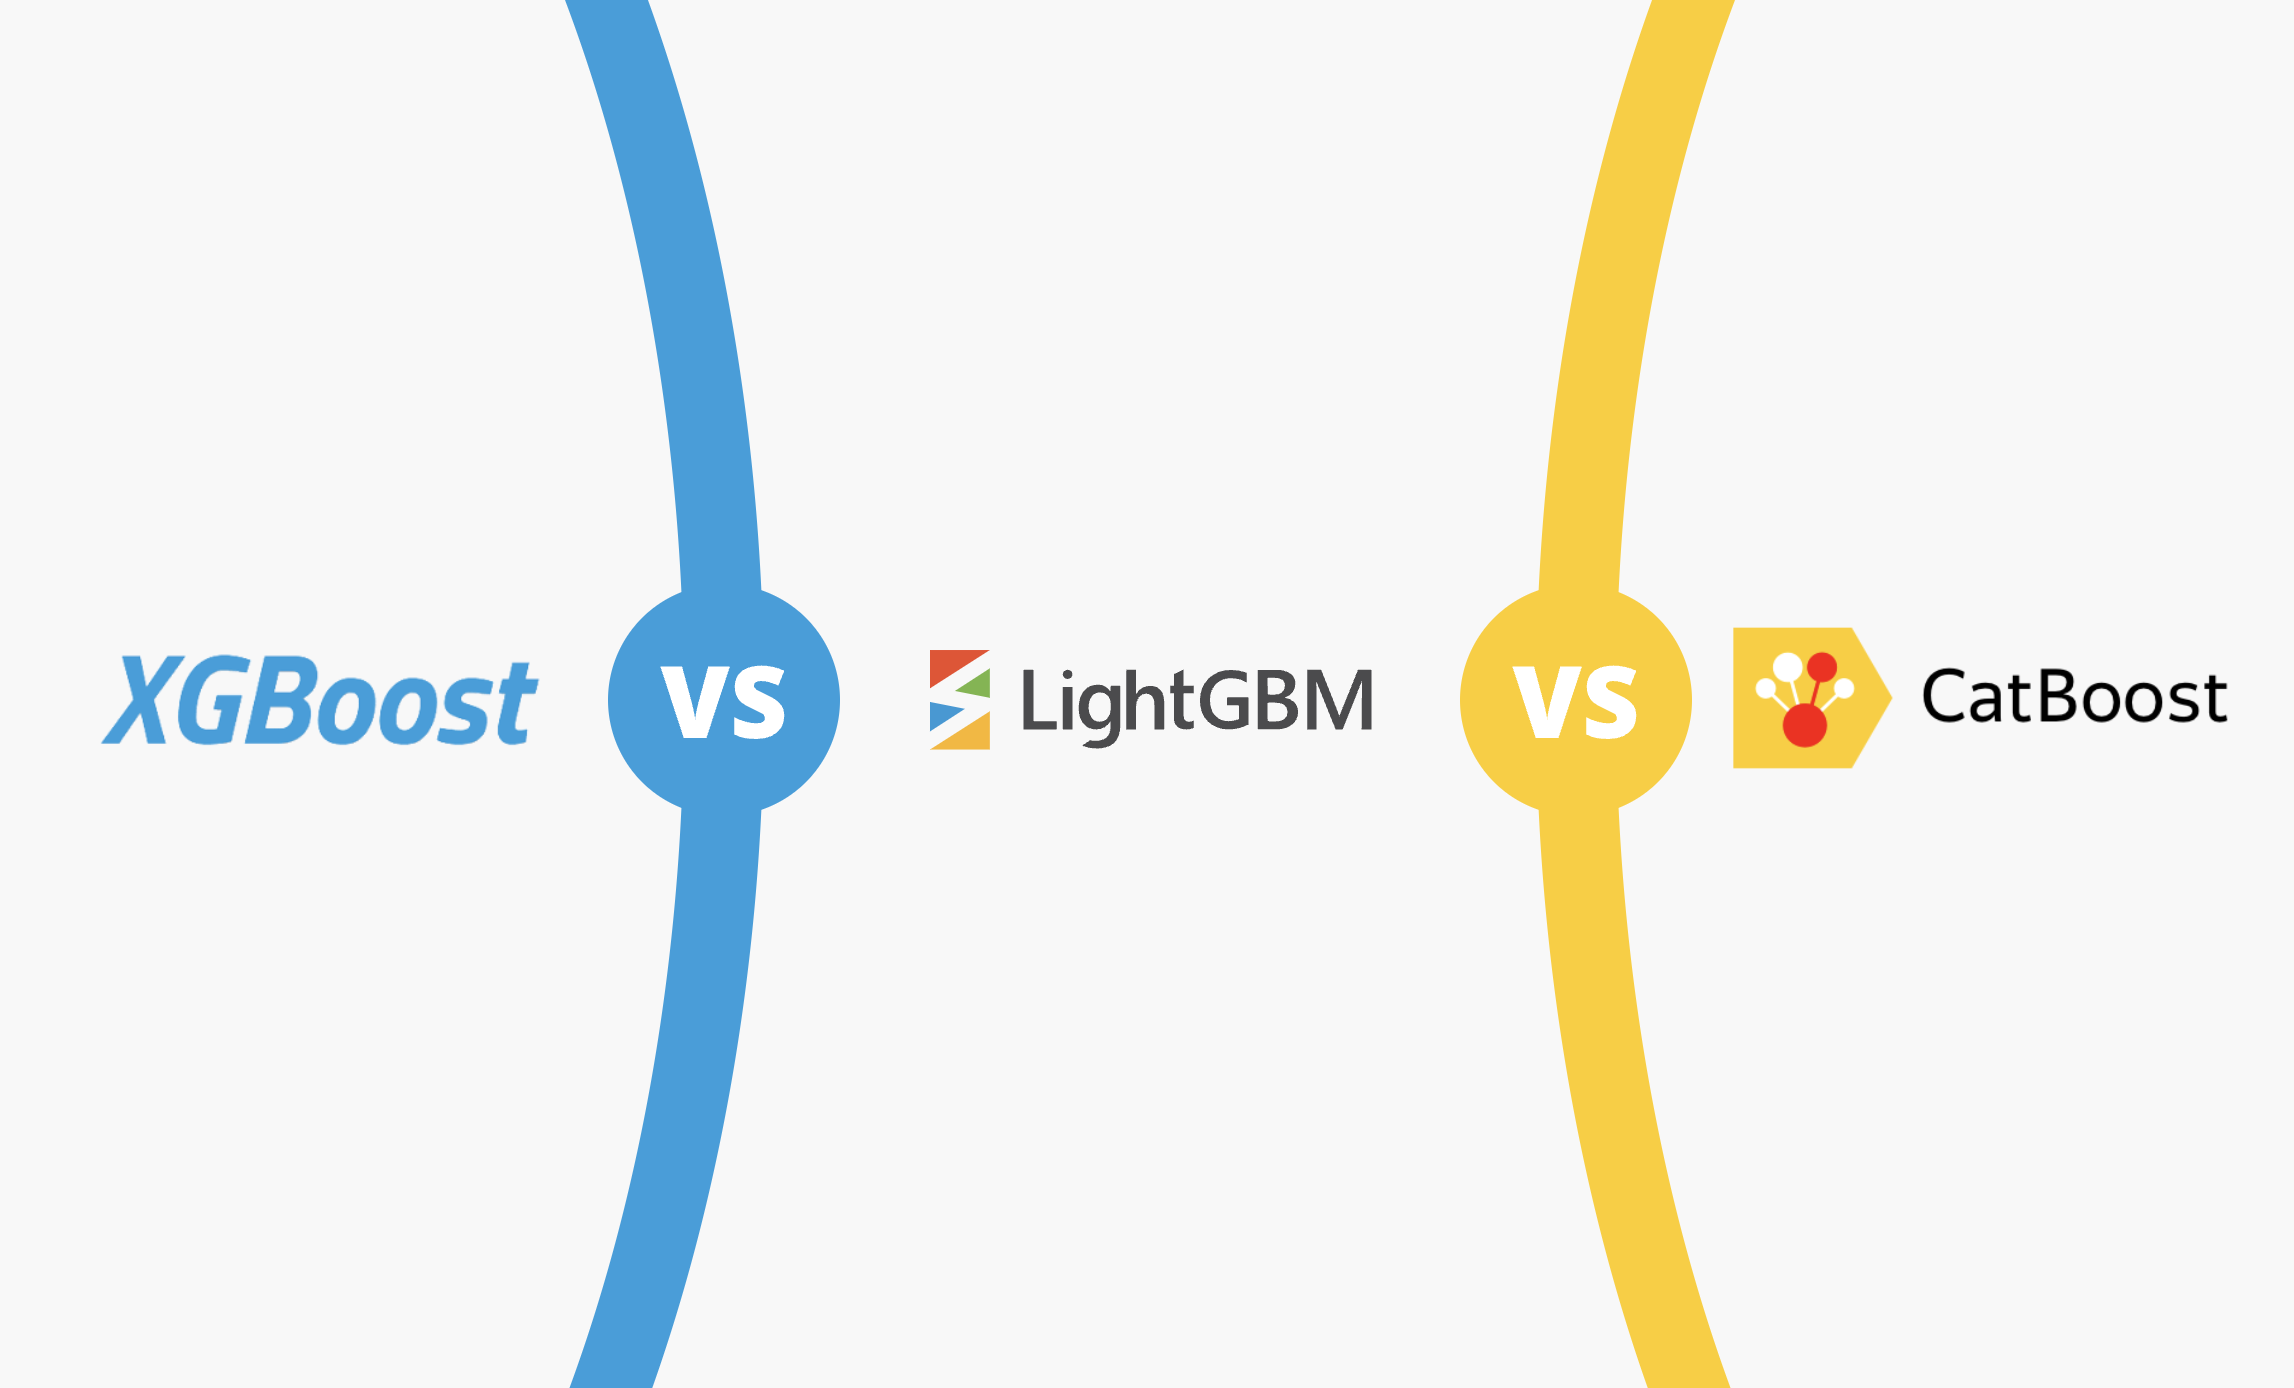

**XGBoost**, **LightGBM** y **CatBoost** son algoritmos de aprendizaje supervisado que utilizan técnicas de boosting con árboles de decisión como weak learners. Son populares debido a su eficiencia en el manejo de grandes cantidades de datos y su capacidad para manejar diversas formas de datos tabulares.

Aunque la idea y el rendimiento son bastante similares entre estos modelos, es crucial entender ciertos aspectos fundamentales que los caracterizan. Por esta razón, a continuación exploraremos algunos de los supuestos clave que definen a cada uno:

### XGBoost (Xtreme Gradient Boosting)

- **Descripción**: XGBoost es un algoritmo de optimización basado en gradientes que utiliza modelos de árboles de decisión ensamblados. Es conocido por su rendimiento y velocidad.
- **Características**:
  - Manejo eficiente de los valores faltantes (los desvia hacía una de las ramas por defecto).
  - Soporte para regularización (L1 y L2) que previene el sobreajuste.
  - Alta flexibilidad, permite definir objetivos de optimización personalizados y funciones de evaluación.

### LightGBM (Light Gradient Boosting Machine)
- **Descripción**: LightGBM es un framework de boosting que utiliza árboles de decisión basados en gradientes. Es similar a XGBoost pero optimizado para ser más rápido y eficiente en memoria.
- **Características**:
  - Utiliza un algoritmo basado en el histograma para la construcción de árboles, lo que reduce el consumo de memoria y aumenta la velocidad.
  - Soporta el crecimiento del árbol por hoja (leaf-wise) que tiende a ser más eficiente para conjuntos de datos grandes.

<center>
<img src='https://www.oreilly.com/api/v2/epubs/9781789346411/files/assets/1da830ed-b89a-4437-83bb-373cdfac49fb.png' width=500 />

> Notar 💡: En el contexto de los algoritmos de árboles de decisión, la forma en que se expanden los árboles durante el entrenamiento puede tener un impacto significativo en el rendimiento y la eficiencia del modelo. Existen dos métodos principales para expandir árboles: el crecimiento por mejor primero (leaf-wise) y el crecimiento por profundidad primero (level-wise). Aunque ambos métodos pueden resultar en la construcción del mismo árbol si se permite que el árbol crezca hasta su máxima profundidad, las diferencias en el orden de expansión del árbol son cruciales, especialmente en escenarios prácticos donde no se suele permitir este crecimiento completo debido a la implementación de criterios de parada temprana y métodos de poda.

### CatBoost
- **Descripción**: CatBoost es un algoritmo de boosting también basado en árboles de decisión que maneja muy bien las variables categóricas sin necesidad de preprocesamiento extenso.
- **Características**:
  - Procesamiento automático de variables categóricas.
  - Menos sensible a los parámetros de configuración, lo que facilita la puesta en marcha.
  - Utiliza simetrización de árboles para reducir el sobreajuste.

> Notar 💡: La simetrización en CatBoost implica que durante la creación de los árboles, el algoritmo utiliza un enfoque que garantiza que las decisiones tomadas en las etapas tempranas del árbol no se basen demasiado en características específicas, ayudando a que el modelo sea más general y menos propenso a ajustarse excesivamente a los datos de entrenamiento.

### Diferencias Principales
- **Manejo de datos**: CatBoost maneja automáticamente las variables categóricas, mientras que en XGBoost y LightGBM se necesita un preprocesamiento previo (a la fecha esto ya fue implementado por los otros algoritmos).
- **Velocidad y uso de memoria**: LightGBM es generalmente más rápido y utiliza menos memoria que XGBoost debido a su algoritmo basado en histogramas. CatBoost, aunque eficiente, puede ser más lento que los otros dos debido a su tratamiento de las variables categóricas.
- **Facilidad de uso**: CatBoost es menos sensible a la configuración de parámetros, lo que lo hace más fácil de usar para principiantes.

### Ejemplo Básico de Uso con Scikit-Learn
A continuación, un pequeño ejemplo de cómo se usa cada uno de estos algoritmos con los wrappers de clasificación en Python:

**XGBoost**:

In [ ]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

**LGBM**:

In [ ]:
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

model = LGBMClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

**CatBoost**:

In [ ]:
from catboost import CatBoostClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

model = CatBoostClassifier(verbose=0)  # `verbose=0` para no mostrar mensajes de entrenamiento
model.fit(X_train, y_train)
print(model.score(X_test, y_test))